In [58]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy import special
import scipy.integrate as integrate

from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

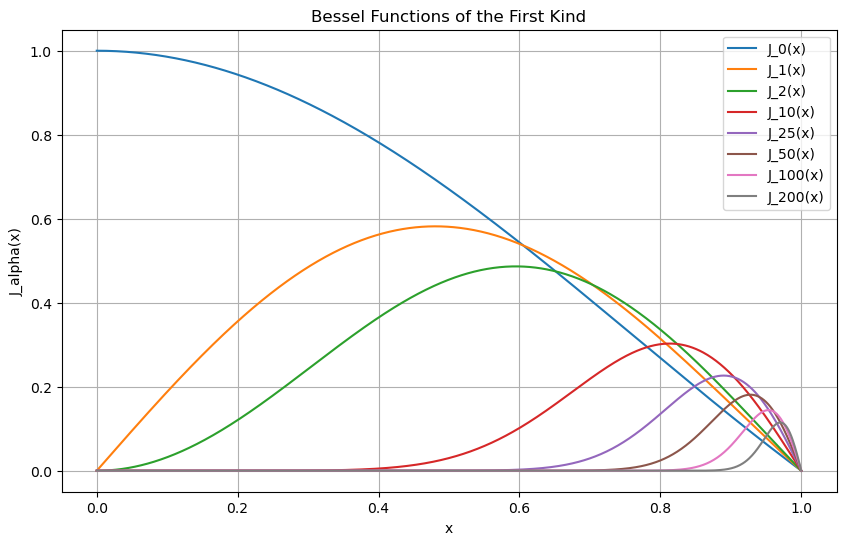

In [59]:
x_end = 1
x = np.linspace(0, x_end, 1000, endpoint=True)
alpha_values = [0, 1, 2, 10, 25, 50, 100, 200]

number_roots = 1

plt.figure(figsize=(10, 6))
for m in alpha_values:
    plt.plot(x, special.jv(m, special.jn_zeros(m, number_roots)[-1] / x_end * x), label=f'J_{m}(x)')

plt.xlabel('x')
plt.ylabel('J_alpha(x)')
plt.title('Bessel Functions of the First Kind')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
r_end = 1
r_start = 0
c = 1

Nr = 100
Nphi = 300


rad = np.linspace(r_start, r_end, Nr, endpoint=True)
phi = np.linspace(0, 2*np.pi, Nphi)

In [61]:
m = 60 # Bessel order
n = 10 # number of root

temp_n = 2

alpha_m = special.jn_zeros(m, n) / r_end
# alpha_m

In [62]:
def initial_state(r: float):
    # return special.jv(m, alpha_m[temp_n] * r)
    return np.exp( - ((r - 0.9) ** 2) / (2 * 0.001))
    return np.ones_like(r)

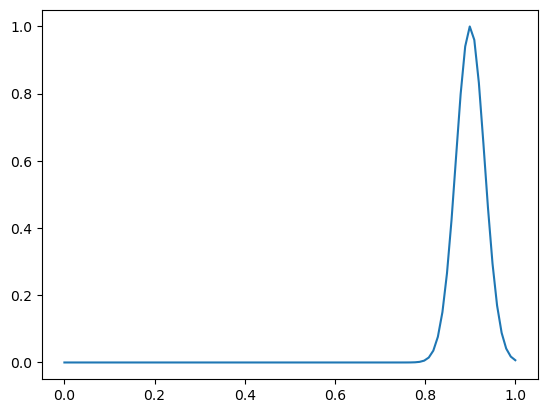

In [63]:
plt.plot(rad, initial_state(rad))
plt.show()

In [64]:
# Начальные условия (пример: гауссов импульс)
def integral_expression(r: float, n: int):
    return special.jv(m, alpha_m[n] * r) * initial_state(r) * r

In [65]:
result = [integrate.quad(integral_expression, r_start, r_end, args=(i))[0] for i in range(0, n)]

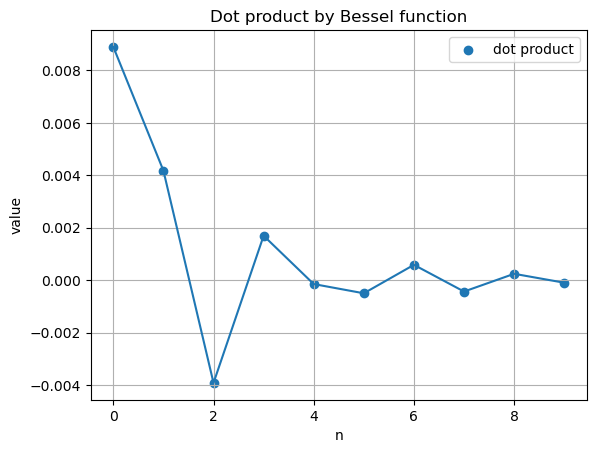

In [66]:
plt.plot(range(0, n), result)
plt.scatter(range(0, n), result, label=f'dot product')

plt.xlabel('n')
plt.ylabel('value')
plt.title('Dot product by Bessel function')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# print(np.sum([a * special.jv(m, alpha_m[i] * rad) for i, a in enumerate(result)], axis=0))
def bessel_sum(r):
    return np.sum([a * special.jv(m, alpha_m[i] * r) for i, a in enumerate(result)], axis=0)

def time_bessel_sum(t, r):
    return np.sum([np.sin(c * alpha_m[i] * t) * a * special.jv(m, alpha_m[i] * r)  for i, a in enumerate(result)], axis=0)

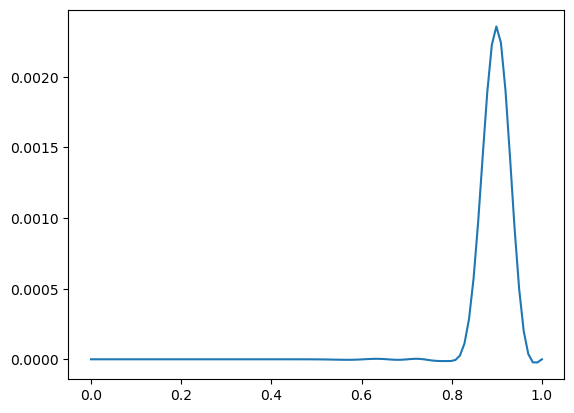

In [68]:
plt.plot(rad, bessel_sum(rad))
plt.show()

In [ ]:
%matplotlib qt6

dt = 0.002  # Шаг по времени (условие Куранта); np.sqrt(3)?
t_max = 2.0       # Время моделирования

# Сетка
Rad_grid, Phi_grid = np.meshgrid(rad, phi, indexing='ij')

X = Rad_grid * np.cos(Phi_grid)
Y = Rad_grid * np.sin(Phi_grid)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

t_curr = 0

bf = bessel_sum(Rad_grid)
sf = np.cos(m * Phi_grid)

# scale_factor = 1 / np.max(bessel_sum(rad))
scale_factor = 100

temp_bessel = np.array([a * special.jv(m, alpha_m[i] * Rad_grid) for i, a in enumerate(result)])


# Функция обновления кадра
def update(frame):
    global t_curr
    # print(f"dt = {dt}")
    print(f"frame = {frame}")
    
    # u_curr = scale_factor * np.cos(c * alpha_m[temp_n] * t_curr) * bf * sf
    u_curr = scale_factor * time_bessel_sum(t_curr, Rad_grid) * sf

    # temp_time = np.array([np.sin(c * alpha_m[i] * t_curr) for i, a in enumerate(result)])
    # u_curr = scale_factor * temp_time * temp_bessel * sf

    # Обновление графика
    ax.clear()
    # ax.set_title(f't = {frame * dt}')
    # ax.set_title(f'текущее время = {round(t_curr, 4)}, dt = {round(dt, 4)}, dr = {round(dr, 4)}, dphi = {round(dphi, 4)}', fontsize=14, fontweight="bold")
    surface = ax.plot_surface(X, Y, u_curr, cmap='viridis')
    ax.set_zlim(-1, 1)

    ax.set_xlabel("X", fontsize=14, fontweight="bold")
    ax.set_ylabel("Y", fontsize=14, fontweight="bold")
    ax.set_zlabel("U", fontsize=14, fontweight="bold")

    t_curr += dt

    return surface

# Создание анимации
ani = FuncAnimation(fig, update, frames=int(t_max/dt), interval=1, blit=False)
plt.show()

Cannot switch Qt versions for this session; you must use qt5.


qt.glx: qglx_findConfig: Failed to finding matching FBConfig for QSurfaceFormat(version 2.0, options QFlags<QSurfaceFormat::FormatOption>(), depthBufferSize -1, redBufferSize 1, greenBufferSize 1, blueBufferSize 1, alphaBufferSize -1, stencilBufferSize -1, samples -1, swapBehavior QSurfaceFormat::SingleBuffer, swapInterval 1, colorSpace QSurfaceFormat::DefaultColorSpace, profile  QSurfaceFormat::NoProfile)
No XVisualInfo for format QSurfaceFormat(version 2.0, options QFlags<QSurfaceFormat::FormatOption>(), depthBufferSize -1, redBufferSize 1, greenBufferSize 1, blueBufferSize 1, alphaBufferSize -1, stencilBufferSize -1, samples -1, swapBehavior QSurfaceFormat::SingleBuffer, swapInterval 1, colorSpace QSurfaceFormat::DefaultColorSpace, profile  QSurfaceFormat::NoProfile)
Falling back to using screens root_visual.


frame = 0
frame = 0
frame = 1
frame = 2
frame = 3
frame = 4
frame = 5
frame = 6
frame = 7
